In [3]:
import finnhub
import pandas as pd
import requests
import math
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from keras.optimizers import Adam
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_squared_error

import datetime as dt
plt.style.use('fivethirtyeight')


API_key = "08a76bb048683631e32c58ecd7741a1d"

key = "bugd5sn48v6s5hg59ba0"
finnhub_client = finnhub.Client(api_key=key)

ticker = "AAPL"

In [80]:
url2 = "https://financialmodelingprep.com/api/v3/technical_indicator/daily/"
   
query_url2 = url2 + ticker + "?period=10&type=rsi" + "&apikey=" + API_key

indicator = requests.get(query_url).json()

print(indicator)

[{'date': '2020-11-13', 'open': 119.44, 'high': 119.67, 'low': 117.87, 'close': 119.26, 'volume': 81688586.0, 'rsi': 58.03625451198665}, {'date': '2020-11-12', 'open': 119.620003, 'high': 120.529999, 'low': 118.57, 'close': 119.209999, 'volume': 103162300.0, 'rsi': 57.929311782536594}, {'date': '2020-11-11', 'open': 117.190002, 'high': 119.629997, 'low': 116.440002, 'close': 119.489998, 'volume': 112295000.0, 'rsi': 58.68303147135837}, {'date': '2020-11-10', 'open': 115.550003, 'high': 117.589996, 'low': 114.129997, 'close': 115.970001, 'volume': 138023400.0, 'rsi': 51.55078084777776}, {'date': '2020-11-09', 'open': 120.5, 'high': 121.989998, 'low': 116.050003, 'close': 116.32, 'volume': 154515300.0, 'rsi': 52.3596190288174}, {'date': '2020-11-06', 'open': 118.32, 'high': 119.199997, 'low': 116.129997, 'close': 118.690002, 'volume': 114457900.0, 'rsi': 57.895625155486734}, {'date': '2020-11-05', 'open': 117.949997, 'high': 119.620003, 'low': 116.870003, 'close': 119.029999, 'volume': 1

In [81]:
indicator_df = pd.DataFrame(indicator)
indicator_df = indicator_df.sort_values(by="date")
indicator_df

,date,open,high,low,close,volume,rsi
1258,2015-11-16,27.844999,28.559999,27.750000,28.545000,152426800.0,0.000000
1257,2015-11-17,28.730000,28.762501,28.330000,28.422501,110467600.0,0.000000
1256,2015-11-18,28.940001,29.372499,28.875000,29.322500,186698800.0,89.086928
1255,2015-11-19,29.410000,29.937500,29.190001,29.695000,173183200.0,92.258533
1254,2015-11-20,29.799999,29.980000,29.712500,29.825001,137148400.0,93.042606
...,...,...,...,...,...,...,...
4,2020-11-09,120.500000,121.989998,116.050003,116.320000,154515300.0,52.359619
3,2020-11-10,115.550003,117.589996,114.129997,115.970001,138023400.0,51.550781
2,2020-11-11,117.190002,119.629997,116.440002,119.489998,112295000.0,58.683031
1,2020-11-12,119.620003,120.529999,118.570000,119.209999,103162300.0,57.929312


In [82]:
url3 = "https://financialmodelingprep.com/api/v3/technical_indicator/daily/"
   
query_url3 = url3 + "SPY?period=10&type=rsi" + "&apikey=" + API_key

spy = requests.get(query_url).json()

print(spy)


[{'date': '2020-11-13', 'open': 119.44, 'high': 119.67, 'low': 117.87, 'close': 119.26, 'volume': 81688586.0, 'rsi': 58.03625451198665}, {'date': '2020-11-12', 'open': 119.620003, 'high': 120.529999, 'low': 118.57, 'close': 119.209999, 'volume': 103162300.0, 'rsi': 57.929311782536594}, {'date': '2020-11-11', 'open': 117.190002, 'high': 119.629997, 'low': 116.440002, 'close': 119.489998, 'volume': 112295000.0, 'rsi': 58.68303147135837}, {'date': '2020-11-10', 'open': 115.550003, 'high': 117.589996, 'low': 114.129997, 'close': 115.970001, 'volume': 138023400.0, 'rsi': 51.55078084777776}, {'date': '2020-11-09', 'open': 120.5, 'high': 121.989998, 'low': 116.050003, 'close': 116.32, 'volume': 154515300.0, 'rsi': 52.3596190288174}, {'date': '2020-11-06', 'open': 118.32, 'high': 119.199997, 'low': 116.129997, 'close': 118.690002, 'volume': 114457900.0, 'rsi': 57.895625155486734}, {'date': '2020-11-05', 'open': 117.949997, 'high': 119.620003, 'low': 116.870003, 'close': 119.029999, 'volume': 1

In [84]:
spy_df = pd.DataFrame(spy)
spy_df = spy_df.sort_values(by='date')
spy_df

,date,open,high,low,close,volume,rsi
1258,2015-11-16,27.844999,28.559999,27.750000,28.545000,152426800.0,0.000000
1257,2015-11-17,28.730000,28.762501,28.330000,28.422501,110467600.0,0.000000
1256,2015-11-18,28.940001,29.372499,28.875000,29.322500,186698800.0,89.086928
1255,2015-11-19,29.410000,29.937500,29.190001,29.695000,173183200.0,92.258533
1254,2015-11-20,29.799999,29.980000,29.712500,29.825001,137148400.0,93.042606
...,...,...,...,...,...,...,...
4,2020-11-09,120.500000,121.989998,116.050003,116.320000,154515300.0,52.359619
3,2020-11-10,115.550003,117.589996,114.129997,115.970001,138023400.0,51.550781
2,2020-11-11,117.190002,119.629997,116.440002,119.489998,112295000.0,58.683031
1,2020-11-12,119.620003,120.529999,118.570000,119.209999,103162300.0,57.929312


In [87]:
merge_df = pd.merge(indicator_df,spy_df, on="date", how="left", suffixes=("","_SPY"))
#merge_df = merge_df.dropna()
merge_df

,date,open,high,low,close,volume,rsi,open_SPY,high_SPY,low_SPY,close_SPY,volume_SPY,rsi_SPY
0,2015-11-16,27.844999,28.559999,27.750000,28.545000,152426800.0,0.000000,27.844999,28.559999,27.750000,28.545000,152426800.0,0.000000
1,2015-11-17,28.730000,28.762501,28.330000,28.422501,110467600.0,0.000000,28.730000,28.762501,28.330000,28.422501,110467600.0,0.000000
2,2015-11-18,28.940001,29.372499,28.875000,29.322500,186698800.0,89.086928,28.940001,29.372499,28.875000,29.322500,186698800.0,89.086928
3,2015-11-19,29.410000,29.937500,29.190001,29.695000,173183200.0,92.258533,29.410000,29.937500,29.190001,29.695000,173183200.0,92.258533
4,2015-11-20,29.799999,29.980000,29.712500,29.825001,137148400.0,93.042606,29.799999,29.980000,29.712500,29.825001,137148400.0,93.042606
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,2020-11-09,120.500000,121.989998,116.050003,116.320000,154515300.0,52.359619,120.500000,121.989998,116.050003,116.320000,154515300.0,52.359619
1255,2020-11-10,115.550003,117.589996,114.129997,115.970001,138023400.0,51.550781,115.550003,117.589996,114.129997,115.970001,138023400.0,51.550781
1256,2020-11-11,117.190002,119.629997,116.440002,119.489998,112295000.0,58.683031,117.190002,119.629997,116.440002,119.489998,112295000.0,58.683031
1257,2020-11-12,119.620003,120.529999,118.570000,119.209999,103162300.0,57.929312,119.620003,120.529999,118.570000,119.209999,103162300.0,57.929312


In [107]:
#splitting data

dataset_train = merge_df
cols = list(dataset_train)[1:]

datelist_train = list(dataset_train['date'])
datelist_train = [dt.datetime.strptime(date, '%Y-%m-%d').date() for date in datelist_train]

print(f"traindata shape = {dataset_train.shape}")
print(f"time stamps = {len(dataset_train)}")
print(f"features = {cols}")


traindata shape = (1259, 13)
time stamps = 1259
features = ['open', 'high', 'low', 'close', 'volume', 'rsi', 'open_SPY', 'high_SPY', 'low_SPY', 'close_SPY', 'volume_SPY', 'rsi_SPY']


In [108]:
dataset_train = dataset_train[cols]
dataset_train = dataset_train.astype(float)
training_set = dataset_train.to_numpy()
training_set

array([[2.78449990e+01, 2.85599990e+01, 2.77500000e+01, ...,
        2.85450000e+01, 1.52426800e+08, 0.00000000e+00],
       [2.87300000e+01, 2.87625010e+01, 2.83300000e+01, ...,
        2.84225010e+01, 1.10467600e+08, 0.00000000e+00],
       [2.89400010e+01, 2.93724990e+01, 2.88750000e+01, ...,
        2.93225000e+01, 1.86698800e+08, 8.90869283e+01],
       ...,
       [1.17190002e+02, 1.19629997e+02, 1.16440002e+02, ...,
        1.19489998e+02, 1.12295000e+08, 5.86830315e+01],
       [1.19620003e+02, 1.20529999e+02, 1.18570000e+02, ...,
        1.19209999e+02, 1.03162300e+08, 5.79293118e+01],
       [1.19440000e+02, 1.19670000e+02, 1.17870000e+02, ...,
        1.19260000e+02, 8.16885860e+07, 5.80362545e+01]])

In [109]:
sc = StandardScaler()
training_set_scaled = sc.fit_transform(training_set)

sc_predict = StandardScaler()
sc_predict.fit_transform(training_set[:, 0:1])

array([[-0.91365225],
       [-0.87590966],
       [-0.86695376],
       ...,
       [ 2.89663959],
       [ 3.00027172],
       [ 2.99259514]])

In [110]:
# Creating a data structure with 90 timestamps and 1 output
X_train = []
y_train = []

n_future = 60   # Number of days we want top predict into the future
n_past = 90     # Number of past days we want to use to predict the future

for i in range(n_past, len(training_set_scaled) - n_future +1):
    X_train.append(training_set_scaled[i - n_past:i, 0:dataset_train.shape[1] - 1])
    y_train.append(training_set_scaled[i + n_future - 1:i + n_future, 0])

X_train, y_train = np.array(X_train), np.array(y_train)

print('X_train shape == {}.'.format(X_train.shape))
print('y_train shape == {}.'.format(y_train.shape))

X_train shape == (1110, 90, 11).
y_train shape == (1110, 1).


In [111]:
# Initializing the Neural Network based on LSTM
model = Sequential()
# Adding 1st LSTM layer
model.add(LSTM(units=64, return_sequences=True, input_shape=(n_past, dataset_train.shape[1]-1)))
# Adding 2nd LSTM layer
model.add(LSTM(units=10, return_sequences=False))
# Adding Dropout
model.add(Dropout(0.25))
# Output layer
model.add(Dense(units=1, activation='linear'))
# Compiling the Neural Network
model.compile(optimizer = Adam(learning_rate=0.01), loss='mean_squared_error')

In [112]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 90, 64)            19456     
_________________________________________________________________
lstm_1 (LSTM)                (None, 10)                3000      
_________________________________________________________________
dropout (Dropout)            (None, 10)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 11        
Total params: 22,467
Trainable params: 22,467
Non-trainable params: 0
_________________________________________________________________


In [116]:
history = model.fit(X_train, y_train, shuffle=True, epochs=50, validation_split=0.2, verbose=1, batch_size=256)

Epoch 1/50
4/4 [==============================] - 0s 61ms/step - loss: 0.0143 - val_loss: 6.1404
Epoch 2/50
4/4 [==============================] - 0s 58ms/step - loss: 0.0135 - val_loss: 5.9548
Epoch 3/50
4/4 [==============================] - 0s 56ms/step - loss: 0.0133 - val_loss: 6.0366
Epoch 4/50
4/4 [==============================] - 0s 57ms/step - loss: 0.0115 - val_loss: 6.1117
Epoch 5/50
4/4 [==============================] - 0s 61ms/step - loss: 0.0109 - val_loss: 6.3185
Epoch 6/50
4/4 [==============================] - 0s 54ms/step - loss: 0.0113 - val_loss: 6.0920
Epoch 7/50
4/4 [==============================] - 0s 58ms/step - loss: 0.0119 - val_loss: 6.1814
Epoch 8/50
4/4 [==============================] - 0s 57ms/step - loss: 0.0110 - val_loss: 6.1490
Epoch 9/50
4/4 [==============================] - 0s 54ms/step - loss: 0.0111 - val_loss: 6.1463
Epoch 10/50
4/4 [==============================] - 0s 59ms/step - loss: 0.0100 - val_loss: 6.1214
Epoch 11/50
4/4 [============

In [118]:

# Generate list of sequence of days for predictions
datelist_future = pd.date_range(datelist_train[-1], periods=n_future, freq='1d').tolist()


# Convert Pandas Timestamp to Datetime object (for transformation) --> FUTURE
datelist_future_ = []
for this_timestamp in datelist_future:
    datelist_future_.append(this_timestamp.date())

In [119]:
predictions_future = model.predict(X_train[-n_future:])

predictions_train = model.predict(X_train[n_past:])

In [122]:
# Inverse the predictions to original measurements

# ---> Special function: convert <datetime.date> to <Timestamp>
def datetime_to_timestamp(x):
    '''
        x : a given datetime value (datetime.date)
    '''
    return dt.datetime.strptime(x.strftime('%Y%m%d'), '%Y%m%d')


y_pred_future = sc_predict.inverse_transform(predictions_future)
y_pred_train = sc_predict.inverse_transform(predictions_train)

PREDICTIONS_FUTURE = pd.DataFrame(y_pred_future, columns=['Open']).set_index(pd.Series(datelist_future))
PREDICTION_TRAIN = pd.DataFrame(y_pred_train, columns=['Open']).set_index(pd.Series(datelist_train[2 * n_past + n_future -1:]))

# Convert <datetime.date> to <Timestamp> for PREDCITION_TRAIN
PREDICTION_TRAIN.index = PREDICTION_TRAIN.index.to_series().apply(datetime_to_timestamp)

PREDICTION_TRAIN.head(3)

,Open
2016-10-27,30.604393
2016-10-28,30.411594
2016-10-31,30.217049


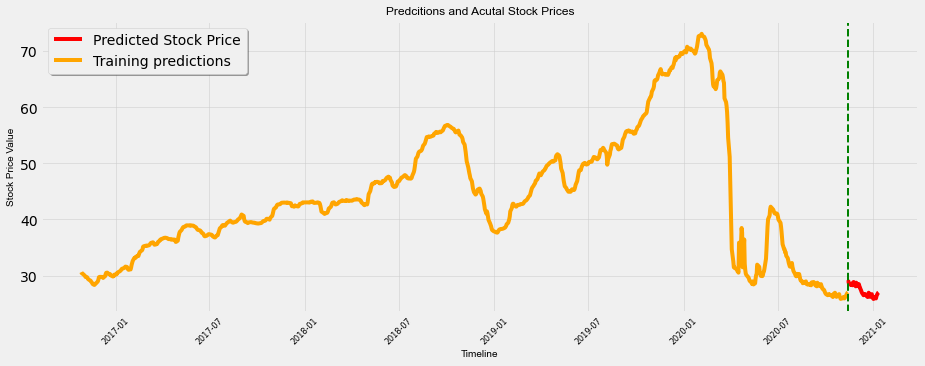

In [210]:
# Set plot size 
from pylab import rcParams
rcParams['figure.figsize'] = 14, 5

# Plot parameters
START_DATE_FOR_PLOTTING = '2016-01-01'

date_df = pd.DataFrame(datelist_train, columns=['Open']).set_index(pd.Series(datelist_train))

#plt.plot(date_df.loc[START_DATE_FOR_PLOTTING:].index, dataset_train.loc[START_DATE_FOR_PLOTTING:]['open'], color='b', label='Actual Stock Price')
plt.plot(PREDICTIONS_FUTURE.index, PREDICTIONS_FUTURE['Open'], color='r', label='Predicted Stock Price')
plt.plot(PREDICTION_TRAIN.loc[START_DATE_FOR_PLOTTING:].index, PREDICTION_TRAIN.loc[START_DATE_FOR_PLOTTING:]['Open'], color='orange', label='Training predictions')


plt.axvline(x = min(PREDICTIONS_FUTURE.index), color='green', linewidth=2, linestyle='--')

plt.grid(which='major', color='#cccccc', alpha=0.5)

plt.legend(shadow=True)
plt.title('Predcitions and Acutal Stock Prices', family='Arial', fontsize=12)
plt.xlabel('Timeline', family='Arial', fontsize=10)
plt.ylabel('Stock Price Value', family='Arial', fontsize=10)
plt.xticks(rotation=45, fontsize=8)
plt.show()

In [186]:
dataset_train.loc[START_DATE_FOR_PLOTTING:].index

Int64Index([ 202,  203,  204,  205,  206,  207,  208,  209,  210,  211,
            ...
            1249, 1250, 1251, 1252, 1253, 1254, 1255, 1256, 1257, 1258],
           dtype='int64', length=1057)

In [170]:
PREDICTIONS_FUTURE.index

DatetimeIndex(['2020-11-13', '2020-11-14', '2020-11-15', '2020-11-16',
               '2020-11-17', '2020-11-18', '2020-11-19', '2020-11-20',
               '2020-11-21', '2020-11-22', '2020-11-23', '2020-11-24',
               '2020-11-25', '2020-11-26', '2020-11-27', '2020-11-28',
               '2020-11-29', '2020-11-30', '2020-12-01', '2020-12-02',
               '2020-12-03', '2020-12-04', '2020-12-05', '2020-12-06',
               '2020-12-07', '2020-12-08', '2020-12-09', '2020-12-10',
               '2020-12-11', '2020-12-12', '2020-12-13', '2020-12-14',
               '2020-12-15', '2020-12-16', '2020-12-17', '2020-12-18',
               '2020-12-19', '2020-12-20', '2020-12-21', '2020-12-22',
               '2020-12-23', '2020-12-24', '2020-12-25', '2020-12-26',
               '2020-12-27', '2020-12-28', '2020-12-29', '2020-12-30',
               '2020-12-31', '2021-01-01', '2021-01-02', '2021-01-03',
               '2021-01-04', '2021-01-05', '2021-01-06', '2021-01-07',
      

In [204]:
PREDICTIONS_FUTURE.dtypes

Open    float32
dtype: object

In [174]:
datelist_train.loc[START_DATE_FOR_PLOTTING:].index

AttributeError: 'list' object has no attribute 'loc'

In [183]:
date = pd.DataFrame(datelist_train)
date.loc[START_DATE_FOR_PLOTTING:].index

RangeIndex(start=202, stop=1259, step=1)

In [188]:
dataset_train.loc[START_DATE_FOR_PLOTTING:]['open']

202      26.975000
203      26.957500
204      26.812500
205      26.160000
206      25.662500
           ...    
1254    120.500000
1255    115.550003
1256    117.190002
1257    119.620003
1258    119.440000
Name: open, Length: 1057, dtype: float64

In [189]:
PREDICTION_TRAIN.loc[START_DATE_FOR_PLOTTING:]['Open']

2016-10-27    30.604393
2016-10-28    30.411594
2016-10-31    30.217049
2016-11-01    30.106838
2016-11-02    30.042614
                ...    
2020-11-09    26.331230
2020-11-10    26.565712
2020-11-11    26.729618
2020-11-12    26.912815
2020-11-13    26.988518
Name: Open, Length: 1020, dtype: float32

In [209]:
pd.DataFrame(datelist_train, columns=['date']).dtypes

date    object
dtype: object

In [202]:
date_df.loc[START_DATE_FOR_PLOTTING:].index

TypeError: '<' not supported between instances of 'datetime.date' and 'str'

In [206]:
date_df

,Open
2015-11-16,2015-11-16
2015-11-17,2015-11-17
2015-11-18,2015-11-18
2015-11-19,2015-11-19
2015-11-20,2015-11-20
...,...
2020-11-09,2020-11-09
2020-11-10,2020-11-10
2020-11-11,2020-11-11
2020-11-12,2020-11-12
